In [4]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv("../data/fashion-mnist_train.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_data = pd.read_csv("../data/fashion-mnist_test.csv")
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print("Training data shape: ", train_data.shape)
print("Testing data shape: ", test_data.shape)

Training data shape:  (60000, 785)
Testing data shape:  (10000, 785)


In [33]:
print("Training data distribution")
print(train_data.label.value_counts())

print("Testing data distribution")
print(test_data.label.value_counts())

Training data distribution
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64
Testing data distribution
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64


In [64]:
y_train = train_data.label
x_train = train_data.drop(columns=['label'])

x_train = x_train.to_numpy().reshape(60000, 28, 28)

y_test = test_data.label
x_test = test_data.drop(columns=['label'])

x_test = x_test.to_numpy().reshape(10000, 28, 28)

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4227 - accuracy: 0.7326 - val_loss: 0.6792 - val_accuracy: 0.7874
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6151 - accuracy: 0.7885 - val_loss: 0.5429 - val_accuracy: 0.8167
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5429 - accuracy: 0.8087 - val_loss: 0.6777 - val_accuracy: 0.7748
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5070 - accuracy: 0.8231 - val_loss: 0.4614 - val_accuracy: 0.8440
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4666 - accuracy: 0.8355 - val_loss: 0.4699 - val_accuracy: 0.8376
Epoch 6/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4312 - accuracy: 0.8488 - val_loss: 0.4910 - val_accuracy: 0.8337
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4109 - accuracy: 0.8572 - val_loss: 0.4259 -

Epoch 57/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2499 - accuracy: 0.9152 - val_loss: 0.5089 - val_accuracy: 0.8827
Epoch 58/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2559 - accuracy: 0.9128 - val_loss: 0.5304 - val_accuracy: 0.8803
Epoch 59/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2421 - accuracy: 0.9162 - val_loss: 0.5729 - val_accuracy: 0.8762
Epoch 60/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2501 - accuracy: 0.9165 - val_loss: 0.6116 - val_accuracy: 0.8765
Epoch 61/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2407 - accuracy: 0.9169 - val_loss: 0.6382 - val_accuracy: 0.8832
Epoch 62/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2570 - accuracy: 0.9157 - val_loss: 0.5903 - val_accuracy: 0.8766
Epoch 63/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2437 - accuracy: 0.9164 - val_loss: 0

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7887 - accuracy: 0.8794


[0.7887026071548462, 0.8794000148773193]

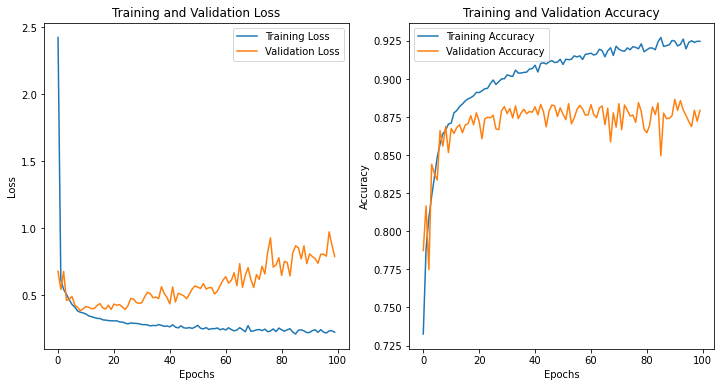

In [69]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Deduction

From the graph we can see that the total epochs for best case is 10. So we will fix epochs to 10 and train the model again.

In [71]:
model_final = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [72]:
model_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
model_final.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4298 - accuracy: 0.7531
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5321 - accuracy: 0.8196
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4832 - accuracy: 0.8335
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4476 - accuracy: 0.8447
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4141 - accuracy: 0.8557
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4066 - accuracy: 0.8581
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3878 - accuracy: 0.8648
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3696 - accuracy: 0.8690
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3572 - accuracy: 0.8741
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

In [74]:
model_final.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8741


[0.36566904187202454, 0.8741000294685364]